# **Braille Character Recognition using CNN**

Jovillar, Stephen Fergus

---


Bongao, Christian

---


Ali, Mohammed

**Importing Dataset from GDrive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

!cp '/content/gdrive/MyDrive/Colab Notebooks/dataset/braille.zip' braille.zip

Mounted at /content/gdrive


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
!unzip braille.zip

Archive:  braille.zip
replace braille/test/a/a1.JPG10rot.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**Importing Libraries**

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Preprocessing**

In [3]:

img_height, img_width = 32, 32
batch_size = 20

**Splitting in train, test, and validation data:**





In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/braille/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/braille/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/braille/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 1040 files belonging to 26 classes.
Found 260 files belonging to 26 classes.
Found 260 files belonging to 26 classes.


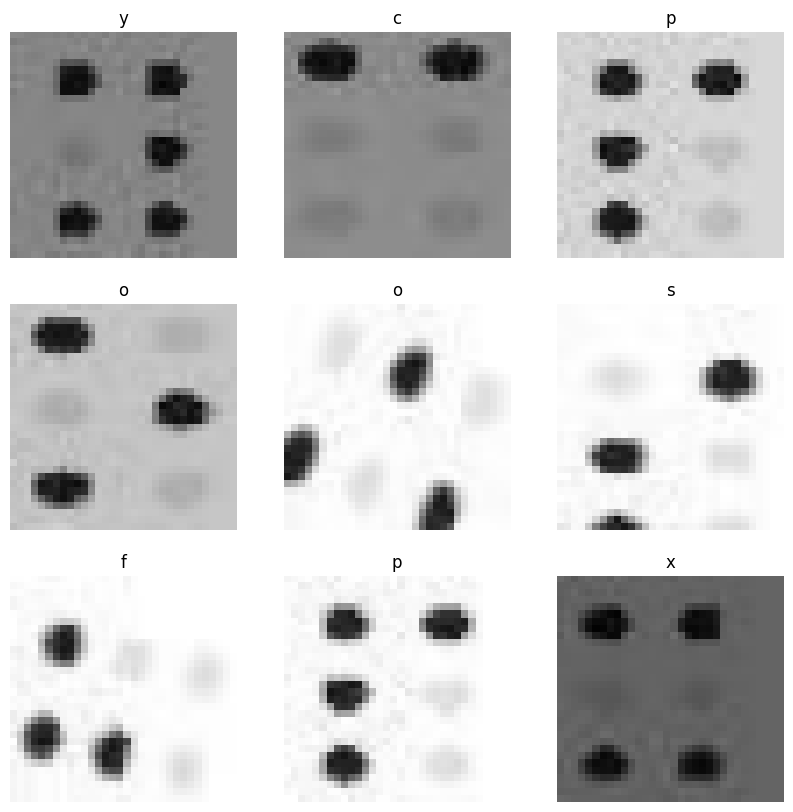

In [5]:
#showing characters per classes
class_names = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k",
               "l", "m,", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w,","x", "y", "z"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Creating the Model**

In [20]:
from tensorflow import keras
model = tf.keras.Sequential(
    [
     #tf.keras.layers.Rescaling(1./255)
     keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
     keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
     keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
     keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
     keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPooling2D(),

     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(units=576, activation="relu"),
     keras.layers.BatchNormalization(),
     keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(units=288, activation="relu"),
     keras.layers.BatchNormalization(),
     keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(units=26, activation="softmax")
    ]
)

In [21]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [22]:
from keras.callbacks import EarlyStopping
es1 = EarlyStopping(patience=20, monitor="val_accuracy", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

In [23]:
mod = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 300,
    callbacks =[es1, es2]
)

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


52/52 [==============================] - 7s 15ms/step - loss: 3.5848 - accuracy: 0.1635 - val_loss: 13.1000 - val_accuracy: 0.1077
Epoch 2/300
52/52 [==============================] - 1s 11ms/step - loss: 2.1766 - accuracy: 0.3923 - val_loss: 14.3644 - val_accuracy: 0.1269
Epoch 3/300
52/52 [==============================] - 1s 10ms/step - loss: 1.5943 - accuracy: 0.5298 - val_loss: 3.3094 - val_accuracy: 0.3000
Epoch 4/300
52/52 [==============================] - 1s 10ms/step - loss: 1.2663 - accuracy: 0.6125 - val_loss: 2.3068 - val_accuracy: 0.4269
Epoch 5/300
52/52 [==============================] - 1s 11ms/step - loss: 1.0081 - accuracy: 0.6875 - val_loss: 1.5188 - val_accuracy: 0.6154
Epoch 6/300
52/52 [==============================] - 1s 10ms/step - loss: 0.8820 - accuracy: 0.7337 - val_loss: 0.8746 - val_accuracy: 0.7385
Epoch 7/300
52/52 [==============================] - 1s 11ms/step - loss: 0.7885 - accuracy: 0.7635 - val_loss: 0.8811 - val_accuracy: 0.7500
Epoch 8/300
52/5

**Evaluating the Model**

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        4864      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                      

In [25]:
time = np.arange(1, len(mod.history['loss'])+1)

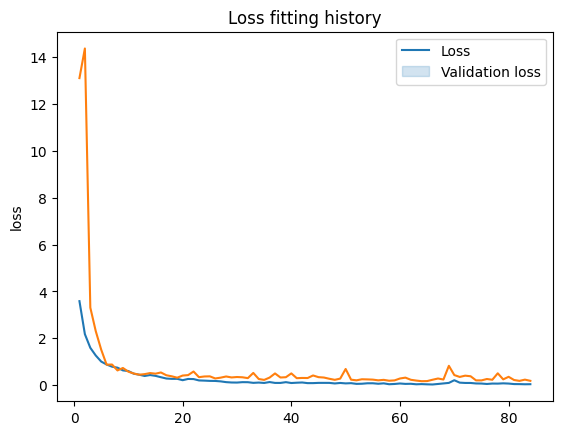

In [26]:
sns.lineplot(data=mod.history, x=time, y='loss')
sns.lineplot(data=mod.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])

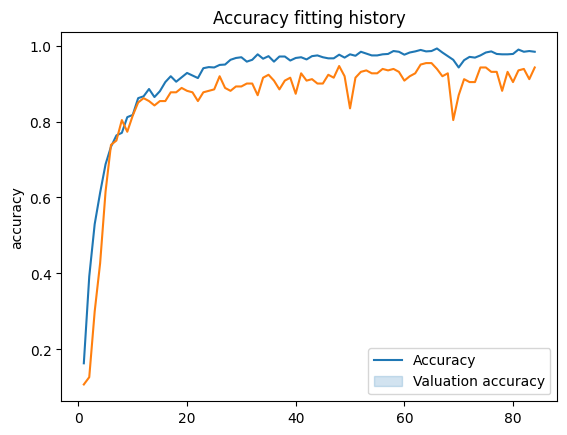

In [27]:
sns.lineplot(data=mod.history, x=time, y='accuracy')
sns.lineplot(data=mod.history, x=time, y='val_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Valuation accuracy'])

In [28]:
model.evaluate(test_ds)

13/13 [==============================] - 0s 4ms/step - loss: 0.1233 - accuracy: 0.9654


[0.12329187989234924, 0.9653846025466919]

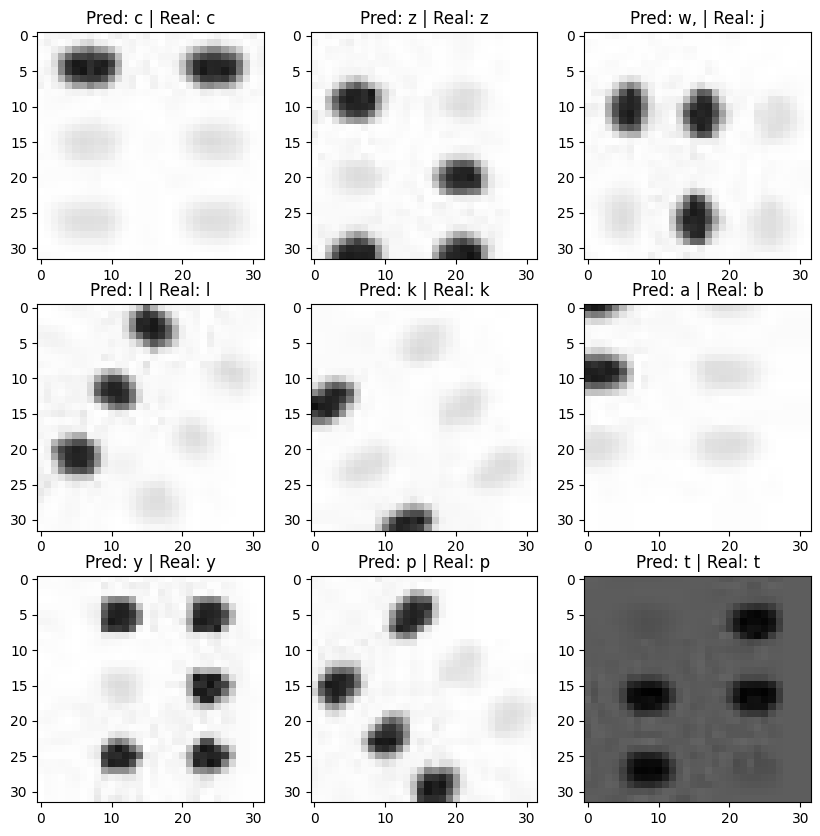

In [29]:
import numpy
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

**Saving the Model**

In [30]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)